In [1]:
from dcr import *

In [2]:
data, _, _, _, _, _, _ = dataprep(data)

In [3]:
data['default_time']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
58996    0.0
58997    0.0
58998    0.0
58999    0.0
59000    0.0
Name: default_time, Length: 59001, dtype: float64

In [4]:
data['PD'] = data['default_time'].mean()

In [5]:
data_default = data.loc[data['default_time'] == 1, :].copy()


In [6]:
data_default.loc[:, 'res_period'] = data_default.loc[:, 'res_time'] - data_default.loc[:, 'time']


<Axes: >

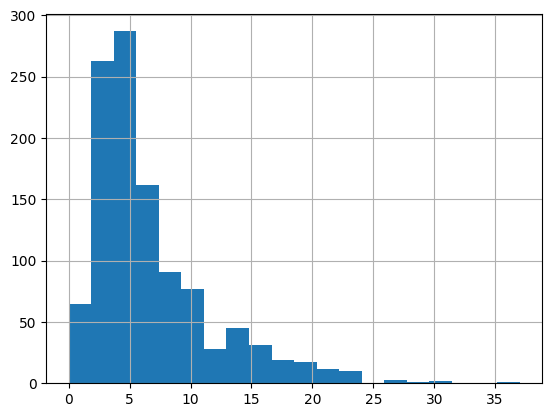

In [7]:
data_default.loc[:, 'res_period'].hist(bins=20)


### 5.4.3 Risk-Free LGD from Observed Workout Cash Flows
LGD from sum of all cashflows during resolution period discounted back to observation time

<Axes: >

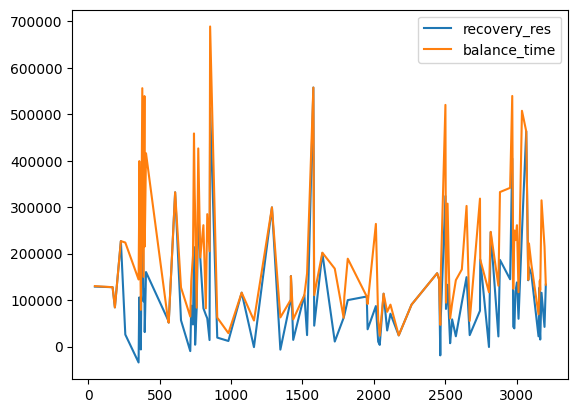

In [11]:
data_default.loc[:, ['recovery_res', 'balance_time']].iloc[:100, :].plot()

In [12]:
data_default.loc[:, 'recovery_res'] = data_default.loc[:, 'recovery_res'].astype(float)
data_default.loc[:, 'NLGD'] = (data_default.loc[:, 'balance_time'] - data_default.loc[:, 'recovery_res'] / (1+data_default.loc[:, 'rate_time'] / (100*4))**data_default.loc[:, 'res_period']) / data_default.loc[:, 'balance_time'] 

<Axes: >

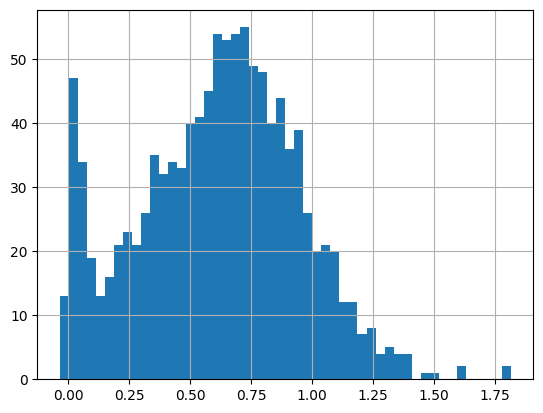

In [13]:
data_default.NLGD.hist(bins=50)

LGD models exclude the values of zero and one and we may set a floor 0.0001 and a cap of 0.9999

In [14]:
data_default.loc[data_default['NLGD']<=0, 'NLGD'] = 0.0001
data_default.loc[data_default['NLGD']>=1, 'NLGD'] = 0.9999

<Axes: >

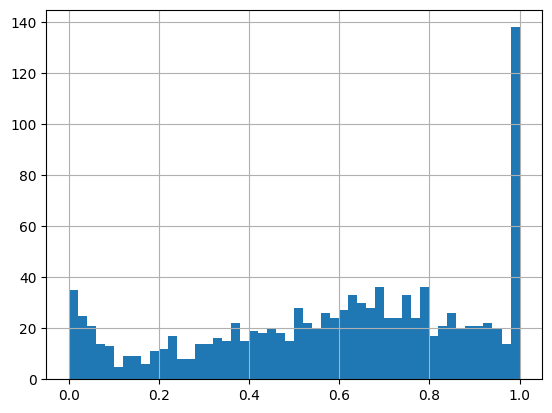

In [15]:
data_default.NLGD.hist(bins=50)

## 5.4.6 LGD Discount Rates
- Loan contract rate
- Bank weighted average cost of capital (WACC)
- Market equilibrium return

In [16]:
data_default.loc[:, 'discount_period'] = data_default.loc[:, 'res_time'] - data_default.loc[:, 'orig_time']
data_default.loc[data_default['discount_period']<=1, 'discount_period'] = 1

In [17]:
data_default.loc[:, 'DR_L'] = (1 - data_default.loc[:, 'PD']) * data_default.loc[:, 'interest_rate_time']/(4*100) + data_default.loc[:, 'PD'] * ((1 + data_default.loc[:, 'interest_rate_time']/(4*100)) * (1 - data_default.loc[:, 'NLGD']))**(1/data_default.loc[:, 'discount_period'])

<Axes: >

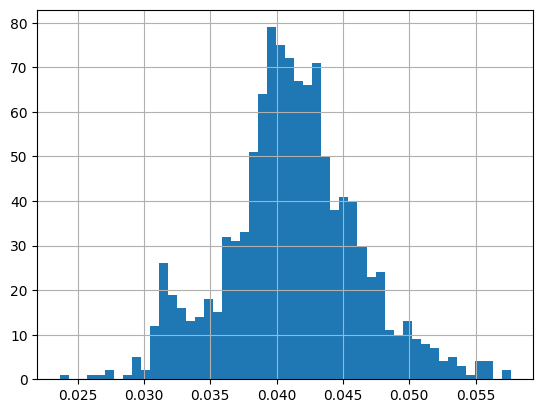

In [18]:
data_default.loc[:, 'DR_L'].hist(bins=50)